Deep Learning.
Estudiante Jorge Barquero

### 1. Cargar ambos archivos - 1 punto

In [521]:
# Import de librerías iniciales
import os as os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# SKlearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# parent dir
parent_dir = os.path.dirname(os.getcwd())

# lectura de archivos
dataTest = pd.read_csv(parent_dir + '/Ejercicio/data/test_v2.csv', encoding='latin1',delimiter=';')
dataTrain = pd.read_csv(parent_dir + '/Ejercicio/data/train_v2.csv', encoding='latin1',delimiter=';')

In [522]:
dataTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1000,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,206000
1,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000
2,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,86000
3,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
4,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905


In [523]:
dataTrain.set_index("Id", inplace=True)
dataTrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Análisis exploratorio: identificar valores desconocidos, filas duplicadas y estadístidos de las variables del conjunto de datos - 1 punto.

In [524]:
dataTest.set_index("Id", inplace=True)
dataTest.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1000,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,206000
1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000
1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,86000
1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905


In [525]:
column_names = dataTest.columns.tolist()
print(column_names)


['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [526]:
# Definir los nuevos nombres descriptivos para cada columna
nuevos_nombres = {
    'MSSubClass': 'ClaseEdificio',
    'MSZoning': 'Zona',
    'LotFrontage': 'FrenteLote',
    'LotArea': 'AreaLote',
    'Street': 'TipoCalle',
    'Alley': 'Callejon',
    'LotShape': 'FormaLote',
    'LandContour': 'ContornoTerreno',
    'Utilities': 'Utilidades',
    'LotConfig': 'ConfiguracionLote',
    'LandSlope': 'InclinacionTerreno',
    'Neighborhood': 'Vecindario',
    'Condition1': 'Condicion1',
    'Condition2': 'Condicion2',
    'BldgType': 'TipoEdificio',
    'HouseStyle': 'EstiloCasa',
    'OverallQual': 'CalidadGeneral',
    'OverallCond': 'CondicionGeneral',
    'YearBuilt': 'AnioConstruccion',
    'YearRemodAdd': 'AnioRemodelacion',
    'RoofStyle': 'EstiloTecho',
    'RoofMatl': 'MaterialTecho',
    'Exterior1st': 'Exterior1',
    'Exterior2nd': 'Exterior2',
    'MasVnrType': 'TipoRevestimientoMamposteria',
    'MasVnrArea': 'AreaRevestimientoMamposteria',
    'ExterQual': 'CalidadExterior',
    'ExterCond': 'CondicionExterior',
    'Foundation': 'Fundacion',
    'BsmtQual': 'CalidadSotano',
    'BsmtCond': 'CondicionSotano',
    'BsmtExposure': 'ExposicionSotano',
    'BsmtFinType1': 'TipoAcabadoSotano1',
    'BsmtFinSF1': 'AreaAcabadaSotano1',
    'BsmtFinType2': 'TipoAcabadoSotano2',
    'BsmtFinSF2': 'AreaAcabadaSotano2',
    'BsmtUnfSF': 'AreaNoAcabadaSotano',
    'TotalBsmtSF': 'AreaTotalSotano',
    'Heating': 'SistemaCalefaccion',
    'HeatingQC': 'CalidadCalefaccion',
    'CentralAir': 'AireAcondicionadoCentral',
    'Electrical': 'SistemaElectrico',
    '1stFlrSF': 'AreaPrimerPiso',
    '2ndFlrSF': 'AreaSegundoPiso',
    'LowQualFinSF': 'AreaBajaCalidad',
    'GrLivArea': 'AreaVivible',
    'BsmtFullBath': 'BanosCompletosSotano',
    'BsmtHalfBath': 'MediosBanosSotano',
    'FullBath': 'BanosCompletos',
    'HalfBath': 'MediosBanos',
    'BedroomAbvGr': 'DormitoriosArriba',
    'KitchenAbvGr': 'CocinasArriba',
    'KitchenQual': 'CalidadCocina',
    'TotRmsAbvGrd': 'TotalHabitaciones',
    'Functional': 'Funcionalidad',
    'Fireplaces': 'Chimeneas',
    'FireplaceQu': 'CalidadChimenea',
    'GarageType': 'TipoGaraje',
    'GarageYrBlt': 'AnioConstruccionGaraje',
    'GarageFinish': 'AcabadoGaraje',
    'GarageCars': 'CapacidadGaraje',
    'GarageArea': 'AreaGaraje',
    'GarageQual': 'CalidadGaraje',
    'GarageCond': 'CondicionGaraje',
    'PavedDrive': 'EntradaPavimentada',
    'WoodDeckSF': 'AreaDeckMadera',
    'OpenPorchSF': 'AreaPorcheAbierto',
    'EnclosedPorch': 'AreaPorcheCerrado',
    '3SsnPorch': 'AreaPorcheTresEstaciones',
    'ScreenPorch': 'AreaPorcheMalla',
    'PoolArea': 'AreaPiscina',
    'PoolQC': 'CalidadPiscina',
    'Fence': 'Cercado',
    'MiscFeature': 'CaracteristicaEspecial',
    'MiscVal': 'ValorCaracteristicaEspecial',
    'MoSold': 'MesVenta',
    'YrSold': 'AnioVenta',
    'SaleType': 'TipoVenta',
    'SaleCondition': 'CondicionVenta',
    'SalePrice': 'PrecioVenta'
}

# Renombrar las columnas en ambos conjuntos de datos
dataTrain = dataTrain.rename(columns=nuevos_nombres)
dataTest = dataTest.rename(columns=nuevos_nombres)


In [527]:
# verificar valores nulos
nan_Test = dataTest.isna().sum().sum()
nan_Train = dataTrain.isna().sum().sum()

print ("Valores NaN en datos de Train: ", nan_Train)
print ("Valores NaN en datos de Test: ", nan_Test)


Valores NaN en datos de Train:  5340
Valores NaN en datos de Test:  2489


In [528]:
# verificar valores duplicados
duplicates_Test = dataTest.duplicated()
duplicates_Train = dataTrain.duplicated()
print("Filas duplicadas en datos de Test: ", duplicates_Test.sum())
print("Filas duplicadas en datos de Test: ", duplicates_Train.sum())

Filas duplicadas en datos de Test:  0
Filas duplicadas en datos de Test:  0


In [529]:
# descripción de valores data test
dataTest.describe()

,ClaseEdificio,FrenteLote,AreaLote,CalidadGeneral,CondicionGeneral,AnioConstruccion,AnioRemodelacion,AreaRevestimientoMamposteria,AreaAcabadaSotano1,AreaAcabadaSotano2,...,AreaDeckMadera,AreaPorcheAbierto,AreaPorcheCerrado,AreaPorcheTresEstaciones,AreaPorcheMalla,AreaPiscina,ValorCaracteristicaEspecial,MesVenta,AnioVenta,PrecioVenta
count,461.000000,375.000000,461.000000,461.000000,461.000000,461.000000,461.000000,459.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,56.854664,70.242667,10130.488069,6.045553,5.548807,1970.550976,1984.015184,91.514161,440.750542,42.648590,...,87.524946,44.503254,23.080260,2.765727,15.041215,6.221258,39.284165,6.344902,2007.789588,178018.427332
std,42.431255,26.519336,5738.877250,1.381590,1.121094,30.651692,21.139850,162.208547,484.642433,151.102953,...,127.110710,62.276195,62.020123,25.491972,56.385749,60.187451,425.503956,2.737883,1.333995,77495.649811
min,20.000000,21.000000,1477.000000,2.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,52500.000000
25%,20.000000,58.500000,7500.000000,5.000000,5.000000,1950.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,50.000000,68.000000,9503.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,378.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,70.000000,80.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,145.000000,694.000000,0.000000,...,161.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,206900.000000
max,190.000000,313.000000,63887.000000,10.000000,9.000000,2009.000000,2009.000000,1378.000000,5644.000000,1031.000000,...,736.000000,547.000000,330.000000,304.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,745000.000000


In [530]:
# descripción de valores data train
dataTrain.describe()

,ClaseEdificio,FrenteLote,AreaLote,CalidadGeneral,CondicionGeneral,AnioConstruccion,AnioRemodelacion,AreaRevestimientoMamposteria,AreaAcabadaSotano1,AreaAcabadaSotano2,...,AreaDeckMadera,AreaPorcheAbierto,AreaPorcheCerrado,AreaPorcheTresEstaciones,AreaPorcheMalla,AreaPiscina,ValorCaracteristicaEspecial,MesVenta,AnioVenta,PrecioVenta
count,999.000000,826.000000,999.000000,999.000000,999.000000,999.000000,999.000000,993.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,56.916917,69.962470,10695.109109,6.124124,5.587588,1971.598599,1985.258258,109.311178,444.972973,48.349349,...,97.345345,47.655656,21.434434,3.706707,15.070070,1.161161,45.429429,6.311311,2007.827828,182260.711712
std,42.261403,23.215821,11417.706546,1.383632,1.109300,30.003240,20.411974,188.961644,442.550816,165.864055,...,124.454384,68.021301,60.723143,30.930996,55.493478,26.116378,525.710557,2.688986,1.325859,80327.919925
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7589.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9452.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,384.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,70.000000,80.000000,11632.000000,7.000000,6.000000,2000.000000,2004.000000,175.000000,726.000000,0.000000,...,171.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3. Ingeniería de variables. Crear una variable - 1 punto (OPCIONAL)

Voy a agregar una variable denominada AreaTotalVivienda, que represente el tamaño total de cada vivienda.
Para esto, sumaré las áreas del sotano, el primer piso y el segundo piso de cada caasa. Esta medida captura el espacio habitable total de la casa, incluyendo todas las áreas principales. 

La inclusión de "AreaTotalVivienda" en nuestro modelo es relevante debido a que el tamaño total de una vivienda puede influir significativamente en su valor de mercado.

In [531]:
# Conjunto de datos de entrenamiento
dataTrain['AreaTotalVivienda'] = dataTrain['AreaTotalSotano'] + dataTrain['AreaPrimerPiso'] + dataTrain['AreaSegundoPiso']

# Conjunto de datos de prueba
dataTest['AreaTotalVivienda'] = dataTest['AreaTotalSotano'] + dataTest['AreaPrimerPiso'] + dataTest['AreaSegundoPiso']

In [532]:
dataTest.iloc[:, -1].head()

Id
1000    2395
1001     944
1002    1382
1003    3148
1004    3360
Name: AreaTotalVivienda, dtype: int64

In [533]:
dataTrain.iloc[:,-1].head()

Id
1    2566
2    2524
3    2706
4    2473
5    3343
Name: AreaTotalVivienda, dtype: int64

### 4. Eliminar las variables de entrada no numéricas (también está admitido utilizar técnicas de label encoder o parecidos para transformar los textos en números) - 1 punto

In [534]:
# Mostrar las primeras filas del conjunto de datos de entrenamiento antes de aplicar el label encoder
print("\nConjunto de datos de entrenamiento antes de aplicar el label encoder:")
print(dataTrain.head())


Conjunto de datos de entrenamiento antes de aplicar el label encoder:
    ClaseEdificio Zona  FrenteLote  AreaLote TipoCalle Callejon FormaLote   
Id                                                                          
1              60   RL        65.0      8450      Pave      NaN       Reg  \
2              20   RL        80.0      9600      Pave      NaN       Reg   
3              60   RL        68.0     11250      Pave      NaN       IR1   
4              70   RL        60.0      9550      Pave      NaN       IR1   
5              60   RL        84.0     14260      Pave      NaN       IR1   

   ContornoTerreno Utilidades ConfiguracionLote  ... CalidadPiscina Cercado   
Id                                               ...                          
1              Lvl     AllPub            Inside  ...            NaN     NaN  \
2              Lvl     AllPub               FR2  ...            NaN     NaN   
3              Lvl     AllPub            Inside  ...            NaN     N

In [535]:
# Mostrar las primeras filas del conjunto de datos de entrenamiento antes de aplicar el label encoder
print("\nConjunto de datos de prueba antes de aplicar el label encoder:")
print(dataTrain.head())


Conjunto de datos de prueba antes de aplicar el label encoder:
    ClaseEdificio Zona  FrenteLote  AreaLote TipoCalle Callejon FormaLote   
Id                                                                          
1              60   RL        65.0      8450      Pave      NaN       Reg  \
2              20   RL        80.0      9600      Pave      NaN       Reg   
3              60   RL        68.0     11250      Pave      NaN       IR1   
4              70   RL        60.0      9550      Pave      NaN       IR1   
5              60   RL        84.0     14260      Pave      NaN       IR1   

   ContornoTerreno Utilidades ConfiguracionLote  ... CalidadPiscina Cercado   
Id                                               ...                          
1              Lvl     AllPub            Inside  ...            NaN     NaN  \
2              Lvl     AllPub               FR2  ...            NaN     NaN   
3              Lvl     AllPub            Inside  ...            NaN     NaN   
4

In [536]:
# Realizar el encoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el label encoder a las características categóricas en el conjunto de datos de entrenamiento
for columna in dataTrain.select_dtypes(include=['object']).columns:
    dataTrain[columna] = label_encoder.fit_transform(dataTrain[columna])

# Aplicar el label encoder a las características categóricas en el conjunto de datos de prueba
for columna in dataTest.select_dtypes(include=['object']).columns:
    dataTest[columna] = label_encoder.fit_transform(dataTest[columna])


In [537]:
# Mostrar las primeras filas del conjunto de datos de entrenamiento después de aplicar el label encoder
print("\nConjunto de datos de entrenamiento después de aplicar el label encoder:")
print(dataTrain.head())


Conjunto de datos de entrenamiento después de aplicar el label encoder:
    ClaseEdificio  Zona  FrenteLote  AreaLote  TipoCalle  Callejon  FormaLote   
Id                                                                              
1              60     3        65.0      8450          1         2          3  \
2              20     3        80.0      9600          1         2          3   
3              60     3        68.0     11250          1         2          0   
4              70     3        60.0      9550          1         2          0   
5              60     3        84.0     14260          1         2          0   

    ContornoTerreno  Utilidades  ConfiguracionLote  ...  CalidadPiscina   
Id                                                  ...                   
1                 3           0                  4  ...               2  \
2                 3           0                  2  ...               2   
3                 3           0                  4  ...    

In [538]:
# Mostrar las primeras filas del conjunto de datos de prueba después de aplicar el label encoder
print("\nConjunto de datos de prueba después de aplicar el label encoder:")
print(dataTest.head())



Conjunto de datos de prueba después de aplicar el label encoder:
      ClaseEdificio  Zona  FrenteLote  AreaLote  TipoCalle  Callejon   
Id                                                                     
1000             20     3        64.0      6762          1         2  \
1001             20     3        74.0     10206          1         2   
1002             30     3        60.0      5400          1         2   
1003             20     3        75.0     11957          1         2   
1004             90     3         NaN     11500          1         2   

      FormaLote  ContornoTerreno  Utilidades  ConfiguracionLote  ...   
Id                                                               ...   
1000          3                3           0                  4  ...  \
1001          3                3           0                  0  ...   
1002          3                3           0                  0  ...   
1003          0                3           0                  4  ... 

In [539]:
# verificar que no haya nulos 
nan_Test = dataTest.isna().sum().sum()
nan_Train = dataTrain.isna().sum().sum()

print ("Valores NaN en datos de Train: ", nan_Train)
print ("Valores NaN en datos de Test: ", nan_Test)

Valores NaN en datos de Train:  235
Valores NaN en datos de Test:  113


In [540]:
# Imputar los valores que quedaron en cero

# Identificar columnas con valores NaN en dataTest
cols_with_nan_test = dataTest.columns[dataTest.isna().any()].tolist()

# Identificar columnas con valores NaN en dataTrain
cols_with_nan_train = dataTrain.columns[dataTrain.isna().any()].tolist()

# Imputar valores NaN en dataTest
imputer_test = SimpleImputer(strategy='median')
dataTest[cols_with_nan_test] = imputer_test.fit_transform(dataTest[cols_with_nan_test])

# Imputar valores NaN en dataTrain
imputer_train = SimpleImputer(strategy='median')
dataTrain[cols_with_nan_train] = imputer_train.fit_transform(dataTrain[cols_with_nan_train])

# Verificar que no haya más valores NaN
nan_test = dataTest.isna().sum().sum()
nan_train = dataTrain.isna().sum().sum()
print("Valores NaN en datos de Train después de imputación:", nan_train)
print("Valores NaN en datos de Test después de imputación:", nan_test)


Valores NaN en datos de Train después de imputación: 0
Valores NaN en datos de Test después de imputación: 0


### 5. Eliminar la(s) variable(s) de entrada que no tengan sentido lógico para realizar la predicción - 1 punto (OPCIONAL)

Considerando que todas las columnas describen aspectos relevantes para la determinación del precio de una vivienda, voy a omitir este punto y no voy a eliminar ninguna columna de los dataset proporcionados.

### 6. Normalizar variables de entrada mediante min-max - 1 punto

In [541]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Normalizar las variables de entrada en el conjunto de datos de entrenamiento
dataTrain.iloc[:, :-1] = scaler.fit_transform(dataTrain.iloc[:, :-1])

# Normalizar las variables de entrada en el conjunto de datos de prueba
dataTest.iloc[:, :-1] = scaler.transform(dataTest.iloc[:, :-1])


### 7. Dividir los datos de entrenamiento en Train (80%) y Validation (20%) - 1 punto

In [542]:

# Dividir los datos de entrenamiento en características (X_train) y etiquetas (y_train)
X_train = dataTrain.drop(columns=['PrecioVenta'])
y_train = dataTrain['PrecioVenta']

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos resultantes
print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Forma del conjunto de validación:", X_val.shape, y_val.shape)


Forma del conjunto de entrenamiento: (799, 80) (799,)
Forma del conjunto de validación: (200, 80) (200,)


### 8. Crear una Red Neuronal con 2 capas ocultas, 200 neuronas en cada capa y función de activación ReLu - 1 punto
Nota: Revisar bien el número de capas, es común que los alumnos introduzcan 1 o 3 sin darse cuenta

In [543]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(1)  # Capa de salida con una neurona para predecir el precio de la vivienda
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar un resumen del modelo
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 200)               16200     
                                                                 
 dense_43 (Dense)            (None, 200)               40200     
                                                                 
 dense_44 (Dense)            (None, 1)                 201       
                                                                 
Total params: 56601 (221.10 KB)
Trainable params: 56601 (221.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9. Entrenar el algoritmo utilizando la métrica RMSE como función de coste  - 1 punto

In [544]:
# Verificar datos faltantes en X_val
missing_X_val = np.isnan(X_val).sum()
print("Datos faltantes en X_val:", missing_X_val)

# Verificar datos faltantes en y_val
missing_y_val = np.isnan(y_val).sum()
print("Datos faltantes en y_val:", missing_y_val)


Datos faltantes en X_val: ClaseEdificio        0
Zona                 0
FrenteLote           0
AreaLote             0
TipoCalle            0
                    ..
MesVenta             0
AnioVenta            0
TipoVenta            0
CondicionVenta       0
AreaTotalVivienda    0
Length: 80, dtype: int64
Datos faltantes en y_val: 0


In [545]:
# Entrenar el modelo utilizando el conjunto de entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluar el modelo en el conjunto de validación utilizando RMSE
val_loss = model.evaluate(X_val, y_val, verbose=0)
val_rmse = val_loss ** 0.5
print("RMSE en el conjunto de validación:", val_rmse)


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 2832.1260 - val_loss: 311.5850
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 249.5598 - val_loss: 0.0626
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 14.1155 - val_loss: 2.0058
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9209 - val_loss: 0.2325
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1204 - val_loss: 0.0191
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0170
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0299
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0170
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0187
E

### 10. Evaluar la predicción en Test - 1 punto

In [546]:
# Hacer predicciones sobre el conjunto de datos de prueba
predictions_test = model.predict(X_val)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_val, predictions_test))
print("RMSE en el conjunto de prueba:", rmse_test)


7/7 [==============================] - 0s 548us/step
RMSE en el conjunto de prueba: 20.704312833214676


### 11. Crear una arquitectura que produzca overfit  - 1 punto

In [547]:
# Definir el modelo
model_overfit = Sequential()

# Añadir capas ocultas
model_overfit.add(Dense(400, input_dim=X_train.shape[1], activation='relu'))
model_overfit.add(Dense(300, activation='relu'))
model_overfit.add(Dense(200, activation='relu'))
model_overfit.add(Dense(100, activation='relu'))

# Añadir capa de salida
model_overfit.add(Dense(1, activation='linear'))

# Compilar el modelo
model_overfit.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Entrenar el modelo
history_overfit = model_overfit.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 2615.6719 - val_loss: 174.7066
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 34.5308 - val_loss: 7.9852
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 2.4148 - val_loss: 0.3433
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1425 - val_loss: 0.0691
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0161
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.0152
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0135
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0272
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0294
Epo

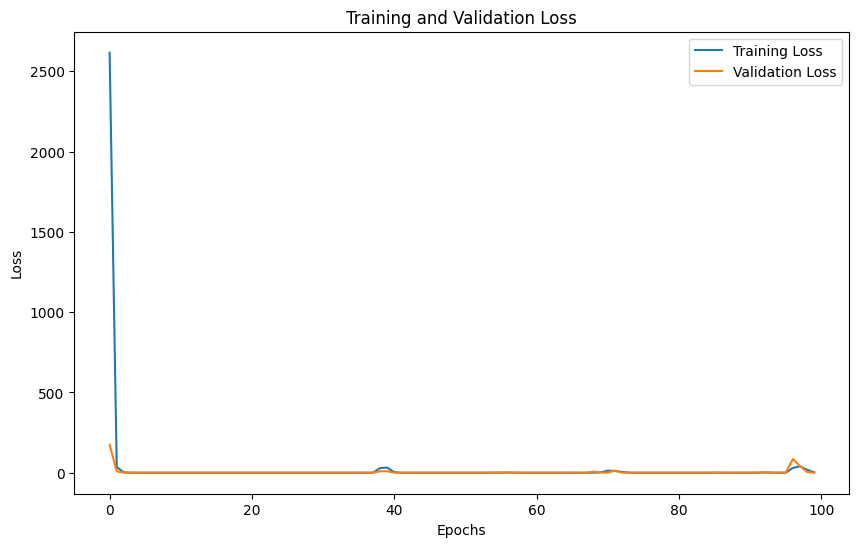

In [548]:
# Obtener la pérdida en el conjunto de entrenamiento y validación
loss_train = history_overfit.history['loss']
loss_val = history_overfit.history['val_loss']

# Graficar la pérdida en función del número de épocas
plt.figure(figsize=(10, 6))
plt.plot(loss_train, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 12. Probar 3 ejemplos con distintas regularizaciones y identificar la que mejor funciona - 1 punto

In [550]:
alpha_values = [0.1, 1.0, 10.0, 0.01, 0.001, 0.0001]

best_alpha = None
best_rmse = float('inf')

print("Resultados de regularización:")

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    y_pred_val = ridge.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    print(f"Alpha={alpha}: RMSE={rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print(f"\nLa mejor regularización es Alpha={best_alpha} con un RMSE de {best_rmse}")


Resultados de regularización:
Alpha=0.1: RMSE=0.052389259676770605
Alpha=1.0: RMSE=0.04266126842938382
Alpha=10.0: RMSE=0.04283441330372916
Alpha=0.01: RMSE=0.05809230240502249
Alpha=0.001: RMSE=0.058880477030273076
Alpha=0.0001: RMSE=0.05896228595197567

La mejor regularización es Alpha=1.0 con un RMSE de 0.04266126842938382
